**Purpose for study only**

# Data understanding

**Fake and real news dataset**

title : The title of the article

text : The text of the article

subject : The subject of the article

date : The date at which the article was posted

Dataset : https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle
# from sklearn.model import train_test_split

# Download Fake Data from csv file and define status is 0.
fake_1='/content/drive/My Drive/project/Fake_news/Fake.csv'
dfraw = pd.read_csv(fake_1)
dfraw= pd.DataFrame(dfraw)
dfraw= dfraw.iloc[0:50,:]
dfraw['status']= 0

# Download True Data from csv file  and define status is 1.
True_1='/content/drive/My Drive/project/Fake_news/True.csv'
dfraw1 = pd.read_csv(True_1)
dfraw1= pd.DataFrame(dfraw1)
dfraw1= dfraw1.iloc[0:50,:]
dfraw1['status']= 1
 
# Concatnate  Fake and True data
df=pd.concat([dfraw, dfraw1], axis=0)
# # print(df.head())
# # print(df.info())
print(df.columns)
print(df.shape)

#Create new dataframe
title_data= df.loc[:,['date','status']]

Index(['title', 'text', 'subject', 'date', 'status'], dtype='object')
(100, 5)


# Data Preparation

Cleaning data in column  'title', 'text' and  'subject'


*   All character to be lower
*   Remove  \[.*?\] 

*   Remove punctuation
*   Remove words containing numbers


In [43]:
import re
import string
cols=['title', 'text', 'subject']

for col in cols:
    
    def clean_text_round1(text):
        ##'''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
        text = text.lower()
        text = re.sub('\[.*?\]', '', text)
        text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
        text = re.sub('\w*\d\w*', '', text)
        return text

    round1 = lambda x: clean_text_round1(x)

    title_data[col] = pd.DataFrame(df[col].apply(round1))
    # print(title_data_clean.head())

    # Apply a second round of cleaning
    def clean_text_round2(text):
        '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
        text = re.sub('[‘’“”…]', '', text)
        text = re.sub('\n', '', text)
        return text
    round2 = lambda x: clean_text_round2(x)
    title_data[col] = pd.DataFrame(title_data[col].apply(round2))
  
#Save data into pickle and csv
title_data.to_pickle('data_clean.pkl')
title_data.to_csv('data_clean.csv')
print(title_data.head())
data=title_data
# print(data)

                date  ...  subject
0  December 31, 2017  ...     news
1  December 31, 2017  ...     news
2  December 30, 2017  ...     news
3  December 29, 2017  ...     news
4  December 25, 2017  ...     news

[5 rows x 5 columns]


Tokenizing  uses nltk  


*   Remove word as the,is ,and etc using stopwords
*   Remove ending that are -ing ,-s ,-able and -ly of words 

*   Create  dictionary of word list

In [ ]:
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from itertools import chain
from nltk.stem import RegexpStemmer
nltk.download('stopwords')
nltk.download('punkt')

def tokenize_text_list(ls):
    
    print("working on")
    stop_words = set(stopwords.words('english'))
    st = RegexpStemmer('ing$|s$|able$|ly$', min=4)
    word_tokens  = list(chain.from_iterable([word_tokenize(ls)]))
    # word_tokens = re.sub('\xed', '', word_tokens)
    # print(word_tokens )
    # filtered_sentence = [ps.stem(w) for w in word_tokens ] 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    # print(filtered_sentence) 
    filtered_sentence = [st.stem(w) for w in filtered_sentence ] 
    # print(filtered_sentence) 
    # print(filtered_sentence) 
    return filtered_sentence

data.tokenized_texts = data.title.map(tokenize_text_list)
data['tokenized_texts'] = data.title.map(tokenize_text_list)
# print(tokenized_texts)
p=set(chain.from_iterable(data.tokenized_texts))
print(p)

#crate dictionay of wording
vocabulary_ = {v: k for k, v in enumerate(set(chain.from_iterable(data.tokenized_texts)))  }
# print(vocabulary_)

#save vocabulary in pickle
with open('vocabulary.pkl', 'wb') as handle:
    pickle.dump(vocabulary_, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('Fake_new\\vocabulary.pkl', 'rb') as handle:
#     x = pickle.load(handle)
print(len(vocabulary_))
f=pd.DataFrame(list( vocabulary_ .items()),columns=['word','ind'])
f.sort_values('ind', ascending=True).reset_index(inplace=True)
f.to_csv("index_test.csv")
# f.to_pickle("Fake_new\index_test.pkl")


#apply index of word on title
def  word_index(word):
    return[vocabulary_[v] for v in word]

data['word_index_line']=data.tokenized_texts.map(word_index)
data.word_index_line=data.tokenized_texts.map(word_index)
print(data.columns)
data.to_csv("index_coulmn_test.csv")
data.to_pickle("index_coulmn_test.pkl")

Vectorize_sequence

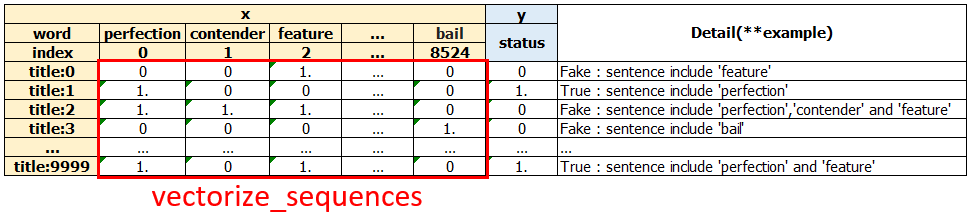

In [45]:
with open('/content/drive/My Drive/project/Fake_news/vocabulary_10000.pkl', 'rb') as handle:
    vocabulary_ = pickle.load(handle)
print(vocabulary_)
print(len(vocabulary_))

{'': 0, 'perfection': 1, 'contender': 2, 'featur': 3, 'born': 4, 'beck': 5, 'affect': 6, 'envision': 7, 'connection': 8, 'beaten': 9, 'disposal': 10, 'facial': 11, 'ted': 12, 'silent': 13, 'rhetoric': 14, 'forget': 15, 'murder': 16, 'annexe': 17, 'retroactive': 18, 'pm': 19, 'horrifying': 20, 'makan': 21, 'africanamerican': 22, 'hamill': 23, 'globalist': 24, 'purchased': 25, 'anonymou': 26, 'revised': 27, 'hacking': 28, 'replied': 29, 'declare': 30, 'carolina': 31, 'charter': 32, 'nominate': 33, 'accurate': 34, 'provider': 35, 'rubio': 36, 'restaurant': 37, 'presid': 38, 'recessionfight': 39, 'rupert': 40, 'refocuse': 41, 'preciou': 42, 'dianne': 43, 'katrina': 44, 'erdogan': 45, 'sledgehammer': 46, 'complete': 47, 'unease': 48, 'yuuge': 49, 'scandalou': 50, 'icymi': 51, 'drove': 52, 'disrespect': 53, 'weakened': 54, 'maneuver': 55, 'cheered': 56, 'senior': 57, 'phony': 58, 'planner': 59, 'hike': 60, 'fink': 61, 'razed': 62, 'covered': 63, 'broadcast': 64, 'reflect': 65, 'icon': 66, 'f

In [46]:
data = pd.read_pickle('/content/drive/My Drive/project/Fake_news/index_coulmn_test_10000.pkl')
print(data.columns)


Index(['date', 'status', 'title', 'text', 'subject', 'word_index_line'], dtype='object')


In [47]:
from sklearn.model_selection import train_test_split

#Download data already tokenize and specify index
data = pd.read_pickle('/content/drive/My Drive/project/Fake_news/index_coulmn_test_10000.pkl')
print(data.head())

with open('/content/drive/My Drive/project/Fake_news/vocabulary_10000.pkl', 'rb') as handle:
    vocabulary_ = pickle.load(handle)
print(len(vocabulary_))


def vectorize_sequences(sequences, dimension=len(vocabulary_)):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    # print(results)
    # print(results.shape)
    for i, sequence in enumerate(sequences):
        # print(sequence)
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
        # print(results)
        # print(results.shape)
    return results

# vectorized title data
x= vectorize_sequences(data.word_index_line)
# X_data_vec.to_pickle("Fake_new\x_data.pkl")
# print(x_train)
print(x.shape)

# Setting status data to array
y = np.asarray(data.status).astype('float32')
print(y.shape)
print(y )

#Split train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)
p=pd.DataFrame(y_train)
p.to_csv('y_train.csv')
q=pd.DataFrame(y_test)
q.to_csv('y_test.csv')

#Split  train dataset to validation  dataset
x_val, partial_x_train, y_val, partial_y_train = train_test_split(x_train,y_train, test_size=0.6)
print(x_val.shape , y_val.shape)
print(partial_x_train.shape,partial_y_train.shape)
# x_val = x_train[:4800]
# partial_x_train = x_train[4800:]
# y_val = y_train[:4800]
# partial_y_train = y_train[4800:]

                date  ...                                    word_index_line
0  December 31, 2017  ...  [490, 3760, 3928, 4881, 4051, 2770, 913, 8381,...
1  December 31, 2017  ...     [3728, 149, 3760, 2480, 7241, 633, 7620, 4426]
2  December 30, 2017  ...  [6103, 7792, 245, 6744, 2067, 8094, 687, 5976,...
3  December 29, 2017  ...   [3760, 6362, 1569, 6287, 7830, 8379, 5054, 2517]
4  December 25, 2017  ...            [1497, 2453, 5077, 490, 3760, 951, 135]

[5 rows x 6 columns]
8525
(10000, 8525)
(10000,)
[0. 0. 0. ... 1. 1. 1.]
(8000, 8525) (2000, 8525)
(8000,) (2000,)
(3200, 8525) (3200,)
(4800, 8525) (4800,)


# Modeling

**Classification  model**

 input  data : vectorized text  size =( len of vocabulary ,)

 Hiddle layer : (16,16,1)

 Output data : Probability data

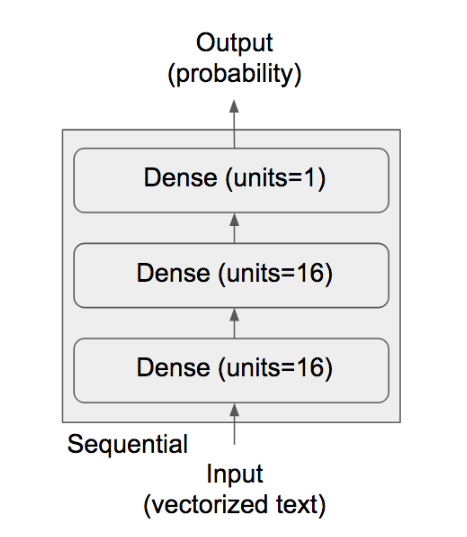

**Activation function**

1. Relu : output > 0

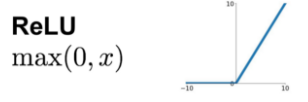

2. sigmoid : Probability output =[-1,1]

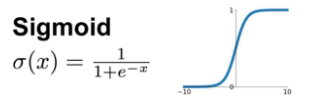

In [48]:
from keras import models
from keras import layers
from keras import optimizers

#Crate model from keras
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(len(vocabulary_),)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 16)                136416    
_________________________________________________________________
dense_20 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 17        
Total params: 136,705
Trainable params: 136,705
Non-trainable params: 0
_________________________________________________________________
None


Trainning model with 20 epochs and mini-batch is 128  with  validation_data

In [49]:
#compile model using binary_crossentropy  because { fake:0 , true:1}
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_val, y_val))

history_dict = history.history
print(history_dict)
print(history_dict.keys())

Train on 4800 samples, validate on 3200 samples
Epoch 1/20
4800/4800 [==============================] - 1s 184us/step - loss: 0.6121 - accuracy: 0.8213 - val_loss: 0.5178 - val_accuracy: 0.9006
Epoch 2/20
4800/4800 [==============================] - 1s 154us/step - loss: 0.4148 - accuracy: 0.9390 - val_loss: 0.3586 - val_accuracy: 0.9181
Epoch 3/20
4800/4800 [==============================] - 1s 156us/step - loss: 0.2578 - accuracy: 0.9560 - val_loss: 0.2512 - val_accuracy: 0.9266
Epoch 4/20
4800/4800 [==============================] - 1s 152us/step - loss: 0.1581 - accuracy: 0.9658 - val_loss: 0.1970 - val_accuracy: 0.9319
Epoch 5/20
4800/4800 [==============================] - 1s 156us/step - loss: 0.1032 - accuracy: 0.9756 - val_loss: 0.1755 - val_accuracy: 0.9350
Epoch 6/20
4800/4800 [==============================] - 1s 154us/step - loss: 0.0719 - accuracy: 0.9815 - val_loss: 0.1685 - val_accuracy: 0.9359
Epoch 7/20
4800/4800 [==============================] - 1s 139us/step - loss

# Evaluation

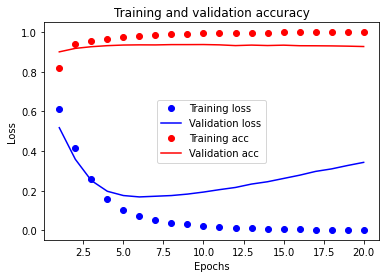

In [50]:
import matplotlib.pyplot as plt
#Plot accuracy  and loss of model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss & accuracy')
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


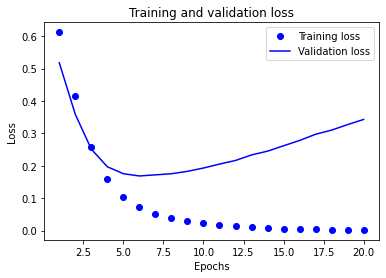

In [51]:
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

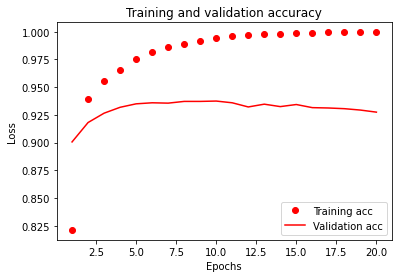

In [52]:
plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [53]:
#Fit model uses 4 epochs to prevent overfit
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(len(vocabulary_),)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=128)


Epoch 1/4
8000/8000 [==============================] - 1s 122us/step - loss: 0.5298 - accuracy: 0.8733
Epoch 2/4
8000/8000 [==============================] - 1s 116us/step - loss: 0.2383 - accuracy: 0.9444
Epoch 3/4
8000/8000 [==============================] - 1s 113us/step - loss: 0.1277 - accuracy: 0.9592
Epoch 4/4
8000/8000 [==============================] - 1s 115us/step - loss: 0.0867 - accuracy: 0.9712


# Deployment

In [54]:
# Accuracy show 94%
results = model.evaluate(x_test, y_test)
print(results)

#predict data
pred = model.predict(x_test)
pre=pd.DataFrame(pred)
pre.to_csv('y_predict.csv')
print(pred)

2000/2000 [==============================] - 0s 85us/step
[0.14293588557839393, 0.9455000162124634]
[[3.2284856e-04]
 [9.9461925e-01]
 [9.9661982e-01]
 ...
 [9.9854302e-01]
 [9.8876381e-01]
 [9.9315214e-01]]


Reference:

https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.5-classifying-movie-reviews.ipynb

https://github.com/adashofdata/nlp-in-python-tutorial/blob/master/1-Data-Cleaning.ipynb

https://medium.com/mmp-li/deep-learning-%E0%B9%81%E0%B8%9A%E0%B8%9A%E0%B8%89%E0%B8%9A%E0%B8%B1%E0%B8%9A%E0%B8%AA%E0%B8%B2%E0%B8%A1%E0%B8%B1%E0%B8%8D%E0%B8%8A%E0%B8%99-ep-2-optimization-activation-function-%E0%B9%80%E0%B8%A3%E0%B8%B5%E0%B8%A2%E0%B8%99%E0%B8%81%E0%B8%B1%E0%B8%99%E0%B8%AA%E0%B8%9A%E0%B8%B2%E0%B8%A2%E0%B9%86%E0%B8%AA%E0%B9%84%E0%B8%95%E0%B8%AA%E0%B9%8C%E0%B8%8A%E0%B8%B4%E0%B8%A5%E0%B9%86-9feb5a87e3b2


https://guopai.github.io/ml-blog17.html

http://dataminingtrend.com/2014/data-mining-techniques/crisp-dm-example/


